<a href="https://colab.research.google.com/github/mirsaidl/DeepLearning_models/blob/main/piza_sushi_steak.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import numpy as np
import pandas as plt
import matplotlib.pylab as plb
import matplotlib.pyplot as plt
import random
from pathlib import Path

from sklearn.preprocessing import LabelEncoder

import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, MaxPooling2D, BatchNormalization, MaxPool2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, regularizers
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical

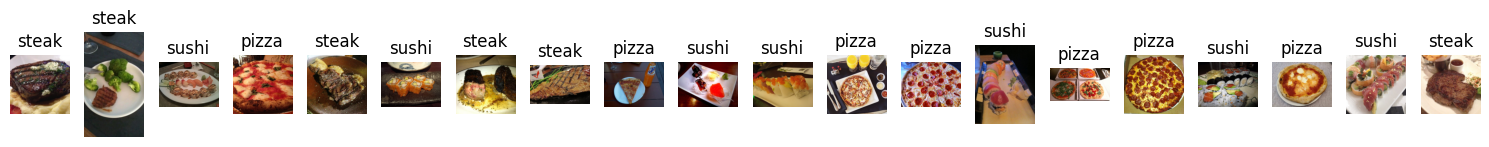

In [4]:
dataset_path = Path("train")
image_files_with_labels = [(str(image_path), image_path.parent.name) for image_path in dataset_path.glob("**/*.jpg")]
num_images_to_display = 20
selected_images = random.sample(image_files_with_labels, num_images_to_display)
plt.figure(figsize=(15, 15))
for i, (image_path, label) in enumerate(selected_images):
    plt.subplot(2, num_images_to_display, i + 1)
    plt.imshow(plt.imread(image_path))
    plt.title(label)
    plt.axis("off")
plt.tight_layout()
plt.show()

In [5]:
def preprocess_image(image_path):
    img = load_img(image_path, target_size=(224, 224))  # Load and resize image
    img_array = img_to_array(img)  # Convert image to array
    img_array /= 255.0  # Normalize pixel values to [0, 1]
    return img_array

In [6]:
encoder = LabelEncoder()

train_path = Path("train")
test_path = Path("test")

train_set = [(str(image_path), image_path.parent.name) for image_path in train_path.glob("**/*.jpg")]
test_set = [(str(image_path), image_path.parent.name) for image_path in test_path.glob("**/*.jpg")]

x_train, y_train = zip(*train_set)
x_test, y_test = zip(*test_set)

x_train = np.array([preprocess_image(image_path) for image_path in x_train])
x_test = np.array([preprocess_image(image_path) for image_path in x_test])

# Mapping
y_train = np.array(y_train).reshape(-1,1)
y_train_encoded = encoder.fit_transform(y_train)
y_train_one_hot = to_categorical(y_train_encoded)

y_test = np.array(y_test).reshape(-1,1)
y_test_encoded = encoder.fit_transform(y_test)
y_test_one_hot = to_categorical(y_test_encoded)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# Define the CNN model
tf.random.set_seed(42)

# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow(x_train, y_train, batch_size=80)

# Model Architecture
model = Sequential()
model.add(Conv2D(24,kernel_size=3,padding='same',activation='relu',
            input_shape=(224,224,3)))
model.add(MaxPool2D())
model.add(Conv2D(48,kernel_size=3,padding='same',activation='relu'))
model.add(MaxPool2D())
model.add(Conv2D(64,kernel_size=3,padding='same',activation='relu'))
model.add(MaxPool2D())
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])


# Compile the model
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=1),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [62]:
# Train the model
train = model.fit(train_generator, batch_size=80,epochs=20,verbose=1,validation_data=(x_test, y_test))

Epoch 1/20
8/8 [==============================] - 3s 313ms/step - loss: 1.0989 - accuracy: 0.3467 - val_loss: 1.0636 - val_accuracy: 0.3867
Epoch 2/20
8/8 [==============================] - 3s 389ms/step - loss: 1.0982 - accuracy: 0.3467 - val_loss: 1.0651 - val_accuracy: 0.4000
Epoch 3/20
8/8 [==============================] - 3s 391ms/step - loss: 1.0982 - accuracy: 0.3467 - val_loss: 1.0618 - val_accuracy: 0.4000
Epoch 4/20
8/8 [==============================] - 2s 302ms/step - loss: 1.0990 - accuracy: 0.3467 - val_loss: 1.0632 - val_accuracy: 0.4000
Epoch 5/20
8/8 [==============================] - 3s 307ms/step - loss: 1.0988 - accuracy: 0.3467 - val_loss: 1.0604 - val_accuracy: 0.4000
Epoch 6/20
8/8 [==============================] - 3s 419ms/step - loss: 1.0981 - accuracy: 0.3467 - val_loss: 1.0580 - val_accuracy: 0.3867
Epoch 7/20
8/8 [==============================] - 3s 305ms/step - loss: 1.0989 - accuracy: 0.3467 - val_loss: 1.0598 - val_accuracy: 0.3867
Epoch 8/20
8/8 [====

In [19]:
y_train = y_train_one_hot.astype(int)
y_test = y_test_one_hot.astype(int)